## 1.0 Introduction

This feature is a wrapper from some imbalanced-learn methods to solve some problems involving imbalanced data sets. 

### 1.1 Import modules

In [8]:
from gumly import imbalanced
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd

# 1.2 Funções Auxiliares


In [23]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

# 1.3 Dados

In [83]:
def create_dataset_over(
    n_samples=1000,
    weights=(0.01, 0.01, 0.98),
    n_classes=3,
    class_sep=0.8,
    n_clusters=1,
):
    return make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters,
        weights=list(weights),
        class_sep=class_sep,
        random_state=0,
    )

def counting_classes(y):
    return Counter(y) #sorted([x[1] for x in Counter(y).items()])

X, y = create_dataset_over(n_samples=1000, weights = (0.05,0.25,0.7))
class_map = counting_classes(y)

In [84]:
class_map

Counter({1: 253, 2: 694, 0: 53})

## 2.0 Oversampling

### 2.1 Oversampling SMOTE

In [85]:
X_resample, y_resample = imbalanced.oversampler(X, y, 'smote', random_state=0,n_neighbors=4)
class_map = counting_classes(y_resample)

In [86]:
class_map

Counter({1: 694, 2: 694, 0: 694})

### 2.2 Ploting exemple with Logistic Regression to understand

In [87]:
clf = LogisticRegression()

### 2.2.1 Exemple Over-Sampling Balanced

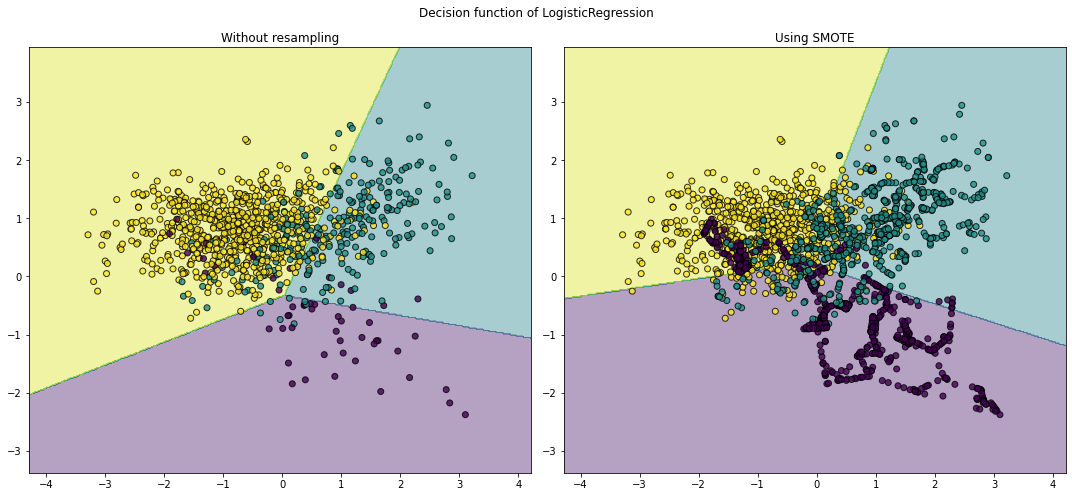

In [88]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
clf.fit(X, y)

plot_decision_function(X, y, clf, axs[0], title="Without resampling")

model = clf.fit(X_resample, y_resample)

plot_decision_function(X_resample,y_resample, model, axs[1], title="Using SMOTE")

fig.suptitle(f"Decision function of LogisticRegression")
fig.tight_layout()

## 3.0 Undersampling 

### 3.2 Undersampling Nearmiss

In [89]:
X_resample, y_resample = imbalanced.undersampler(X, y, 'nearmiss', random_state=0)
class_map = counting_classes(y_resample)

In [90]:
class_map

Counter({0: 53, 1: 53, 2: 53})

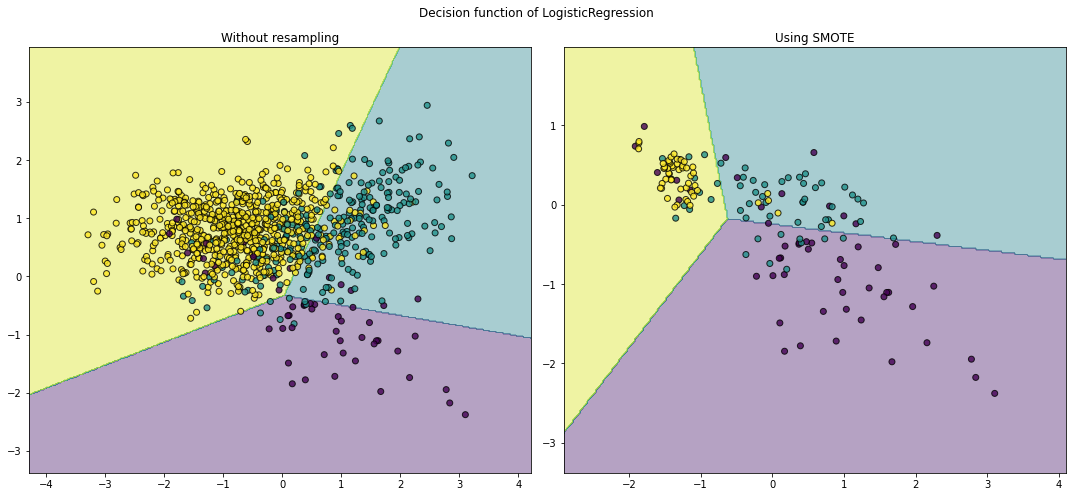

In [91]:
# Plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
clf.fit(X, y)

plot_decision_function(X, y, clf, axs[0], title="Without resampling")

model = clf.fit(X_resample, y_resample)

plot_decision_function(X_resample,y_resample, model, axs[1], title="Using SMOTE")

fig.suptitle(f"Decision function of LogisticRegression")
fig.tight_layout()

# 4.0 Combine

### 4.2 SMOTETOMEK

In [92]:
X_resample, y_resample = imbalanced.combine(X, y, 'smotetomek', random_state=0)
class_map = counting_classes(y_resample)
class_map

Counter({1: 646, 2: 631, 0: 663})

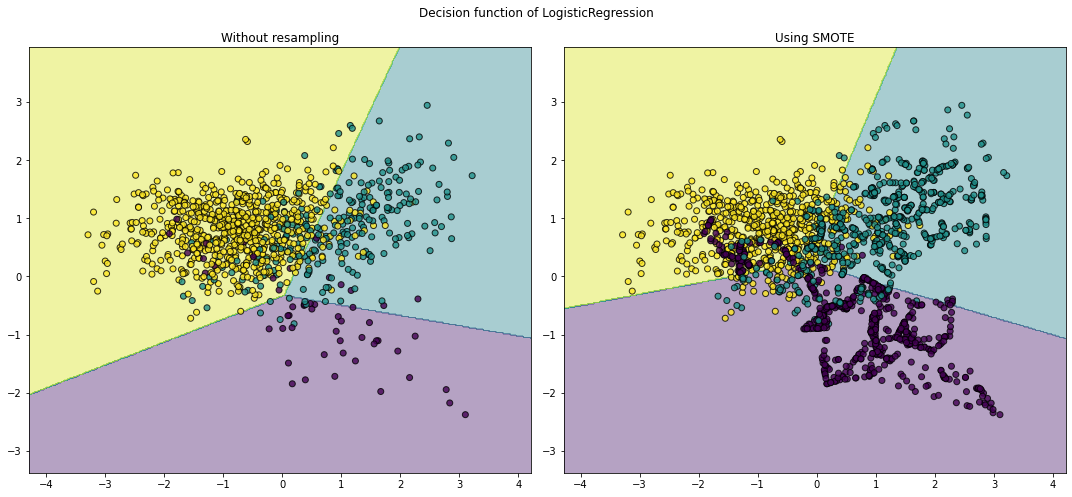

In [93]:
# Plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
clf.fit(X, y)

plot_decision_function(X, y, clf, axs[0], title="Without resampling")

model = clf.fit(X_resample, y_resample)

plot_decision_function(X_resample,y_resample, model, axs[1], title="Using SMOTETOMEK")

fig.suptitle(f"Decision function of LogisticRegression")
fig.tight_layout()